# Internship 8 : Web Scraping Assignment 1 using BeautifulSoup

# Que 8 : 

### Step 1 : Find the URL that we wish to Scrape

### Step 2 : Inspect the page

### Step 3 : Find the data you want to extract

### Step 4 : Write the code

In [83]:
# Import essential libraries

import numpy as np
import pandas as pd

from selenium import webdriver
from bs4 import BeautifulSoup

import requests
import urllib.request
from urllib.request import urlopen


In [84]:
# Configure webdriver to use Chrome Browser

driver = webdriver.Chrome("chromedriver.exe")
driver.get("https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c")

<html dir="ltr" lang="en-US"><head><script src="https://cdn.optimizely.com/public/2972860641/17941370450/25_8b2d74b884623f771854d5167468b9ac7724da9cbc4f22ddd898431056975ff7_tracking.js" type="text/javascript"></script>
<script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script src="https://bam-cell.nr-data.net/1/e6bbbab7f0?a=390783636&amp;v=1184.ab39b52&amp;to=Z1RQNhBXC0FUWkQIW14ecRcRQgpfGgNcDldRXVddTUEAU0FRVRMbRFRcBgNPSl4aA1wOV3lV&amp;rst=3798&amp;ck=0&amp;ref=https://weather.com/weather/tenday/l/San%2BFrancisco%2BCA&amp;ap=573.139919&amp;be=545&amp;fe=3546&amp;dc=2785&amp;tt=15e76e296f4f430&amp;perf=%7B%22timing%22:%7B%22of%22:1604077112358,%22n%22:0,%22f%22:1,%22dn%22:5,%22dne%22:299,%22c%22:299,%22s%22:342,%22ce%22:405,%22rq%22:406,%22rp%22:500,%22rpe%22:785,%22dl%22:516,%22di%22:2298,%22ds%22:2785,%22de%22:2785,%22dc%22:3546,%22l%22:3546,%22le%22:3548%7D,%22navigation%22:%7B%7D%7D&amp;fp=2675&amp;fcp=2675&amp;jsonp=NREUM.setToken" type="text/javascript"></s
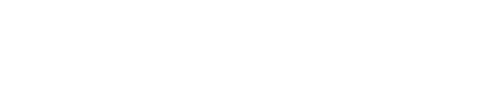
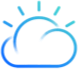

In [85]:
content = driver.page_source
soup = BeautifulSoup(content)
print(soup)

In [86]:
period = soup.find_all('h2', class_ = 'DetailsSummary--daypartName--1Mebr' )

Period = []

for i in period:
    Period.append(i.text)
    
Period

['Sat 31',
 'Sun 01',
 'Mon 02',
 'Tue 03',
 'Wed 04',
 'Thu 05',
 'Fri 06',
 'Sat 07',
 'Sun 08',
 'Mon 09',
 'Tue 10',
 'Wed 11',
 'Thu 12',
 'Fri 13']

In [87]:
temperature = soup.find_all('div', class_ = 'DetailsSummary--temperature--3FMlw')

Temperature = []

for i in temperature:
    Temperature.append(i.text)

Temperature

['70°/50°',
 '72°/51°',
 '74°/51°',
 '68°/54°',
 '69°/53°',
 '74°/54°',
 '69°/50°',
 '61°/49°',
 '61°/47°',
 '64°/46°',
 '64°/47°',
 '63°/46°',
 '64°/47°',
 '65°/47°']

In [88]:
description = soup.find_all('span', class_ = 'DetailsSummary--extendedData--aaFeV')

Description = []

for i in description:
    Description.append(i.text)
    
Description

['Partly Cloudy',
 'Mostly Sunny',
 'Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'Sunny',
 'Partly Cloudy',
 'Sunny',
 'Sunny',
 'Sunny',
 'Partly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy',
 'Partly Cloudy']

In [89]:
short_description_wind = soup.find_all('div', class_ = 'DetailsSummary--wind--Cv4BH DetailsSummary--extendedData--aaFeV')

Short_Description = []

for i in short_description_wind:
    Short_Description.append(i.text)
    
Short_Description

['N 11 mph',
 'N 11 mph',
 'NNW 11 mph',
 'WNW 12 mph',
 'WNW 9 mph',
 'NNW 12 mph',
 'NW 17 mph',
 'NW 16 mph',
 'NW 18 mph',
 'NNW 12 mph',
 'N 11 mph',
 'WNW 13 mph',
 'NNE 11 mph',
 'N 9 mph']

In [95]:
len(Short_description_all)

120

In [90]:
print(len(Period))
print(len(Temperature))
print(len(Description))
print(len(Short_Description))

14
14
14
14


In [91]:
df=pd.DataFrame({"Period":Period[0:7],"Temperature":Temperature[0:7], "Description":Description[0:7], "Short_Description": Short_Description[0:7]})

In [92]:
df

,Period,Temperature,Description,Short_Description
0,Sat 31,70°/50°,Partly Cloudy,N 11 mph
1,Sun 01,72°/51°,Mostly Sunny,N 11 mph
2,Mon 02,74°/51°,Sunny,NNW 11 mph
3,Tue 03,68°/54°,Partly Cloudy,WNW 12 mph
4,Wed 04,69°/53°,Partly Cloudy,WNW 9 mph
5,Thu 05,74°/54°,Sunny,NNW 12 mph
6,Fri 06,69°/50°,Partly Cloudy,NW 17 mph


In [93]:
df.to_csv('7_day_forecast_for_Sanfransisco.csv', index = False, encoding = 'utf-8-sig')

# End of Scrapping 7 day extended forecast display for the city, Sanfransisco